# Chapter 1: Data Exploration and cleaning

In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [3]:
raw_data=pd.read_excel('default_of_credit_card_clients__courseware_version_1_21_19.xls')
raw_data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          30000 non-null  object
 1   LIMIT_BAL                   30000 non-null  int64 
 2   SEX                         30000 non-null  int64 
 3   EDUCATION                   30000 non-null  int64 
 4   MARRIAGE                    30000 non-null  int64 
 5   AGE                         30000 non-null  int64 
 6   PAY_1                       30000 non-null  object
 7   PAY_2                       30000 non-null  int64 
 8   PAY_3                       30000 non-null  int64 
 9   PAY_4                       30000 non-null  int64 
 10  PAY_5                       30000 non-null  int64 
 11  PAY_6                       30000 non-null  int64 
 12  BILL_AMT1                   30000 non-null  int64 
 13  BILL_AMT2                   30000 non-null  in

In [5]:
raw_data['ID'].nunique()

29687

In [6]:
id_counts = raw_data['ID'].value_counts()
id_counts.head()

cd944abe-cef9    2
4653bc48-0141    2
733aa344-0dae    2
b9591d1a-8480    2
94e1b326-8c22    2
Name: ID, dtype: int64

In [7]:
dupe_mask = id_counts == 2

In [8]:
dupe_ids = id_counts.index[dupe_mask]
dupe_ids

Index(['cd944abe-cef9', '4653bc48-0141', '733aa344-0dae', 'b9591d1a-8480',
       '94e1b326-8c22', 'b6ca3733-7459', '0ad143f2-bd95', '4a051fdc-d04c',
       '16ee3668-0b5b', 'c361e43d-f1f4',
       ...
       '823267c1-561b', 'f41bbcf7-5f86', '73ed1381-3a3f', '2f4f4bc9-fd55',
       '956cbf4a-d24e', '0a37c2c7-6065', '8b62a9c9-7b64', '428b26a3-dca2',
       '33bf169b-258a', '97f74dea-338e'],
      dtype='object', length=313)

In [9]:
dupe_ids = list(dupe_ids)

In [10]:
raw_data.loc[raw_data['ID'].isin(dupe_ids),:].head(10) 

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
141,26bde6da-f148,180000,1,2,2,28,-1,-1,-1,-1,...,332,416,416,0,416,332,500,3500,832,0
196,42009c72-651f,150000,2,2,1,34,-2,-2,-2,-2,...,116,0,1500,0,0,116,0,1500,0,0
241,26bde6da-f148,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
296,42009c72-651f,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
323,73ed1381-3a3f,230000,2,2,1,28,0,0,0,-2,...,2100,767,6173,1710,1100,1000,767,6173,1000,1
340,4f95b36b-ab10,240000,2,2,2,30,-2,-2,-2,-2,...,0,92,0,92,92,0,92,0,1883,0
398,8d3a2576-a958,210000,2,2,1,30,Not available,0,0,0,...,91143,82733,74125,4002,5000,3500,3000,2700,5000,0
423,73ed1381-3a3f,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
440,4f95b36b-ab10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
498,8d3a2576-a958,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
zero_mask = raw_data == 0 
feature_zero_mask = zero_mask.iloc[:,1:].all(axis=1) #axis=1 aplies .all() to the row instead of the column (axis=0)

In [12]:
clean_data = raw_data.loc[~feature_zero_mask,:].copy() #use .copy to create an independent copy of the clean_data
clean_data.head()                                       #this way the raw_data will not change when modifying clean_data

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [13]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29685 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          29685 non-null  object
 1   LIMIT_BAL                   29685 non-null  int64 
 2   SEX                         29685 non-null  int64 
 3   EDUCATION                   29685 non-null  int64 
 4   MARRIAGE                    29685 non-null  int64 
 5   AGE                         29685 non-null  int64 
 6   PAY_1                       29685 non-null  object
 7   PAY_2                       29685 non-null  int64 
 8   PAY_3                       29685 non-null  int64 
 9   PAY_4                       29685 non-null  int64 
 10  PAY_5                       29685 non-null  int64 
 11  PAY_6                       29685 non-null  int64 
 12  BILL_AMT1                   29685 non-null  int64 
 13  BILL_AMT2                   29685 non-null  in

In [14]:
clean_data['PAY_1'].unique()

array([2, -1, 0, -2, 1, 'Not available', 3, 4, 8, 7, 5, 6], dtype=object)

In [15]:
pay_1_mask = clean_data['PAY_1'] != 'Not available'
clean_data = clean_data.loc[pay_1_mask,:]
clean_data['PAY_1'] = clean_data['PAY_1'].astype('int64') 
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26664 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          26664 non-null  object
 1   LIMIT_BAL                   26664 non-null  int64 
 2   SEX                         26664 non-null  int64 
 3   EDUCATION                   26664 non-null  int64 
 4   MARRIAGE                    26664 non-null  int64 
 5   AGE                         26664 non-null  int64 
 6   PAY_1                       26664 non-null  int64 
 7   PAY_2                       26664 non-null  int64 
 8   PAY_3                       26664 non-null  int64 
 9   PAY_4                       26664 non-null  int64 
 10  PAY_5                       26664 non-null  int64 
 11  PAY_6                       26664 non-null  int64 
 12  BILL_AMT1                   26664 non-null  int64 
 13  BILL_AMT2                   26664 non-null  in

array([[<AxesSubplot:title={'center':'LIMIT_BAL'}>,
        <AxesSubplot:title={'center':'AGE'}>]], dtype=object)

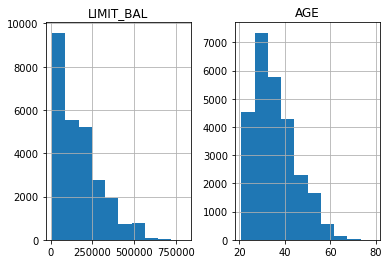

In [16]:
clean_data[['LIMIT_BAL', 'AGE']].hist()     #using pandas and matplotlib

<AxesSubplot:xlabel='AGE', ylabel='Count'>

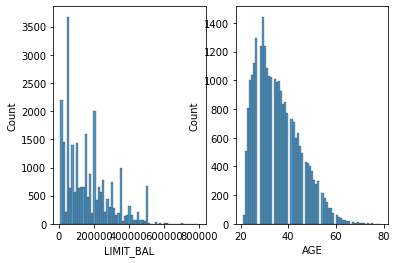

In [17]:
fig, axs = plt.subplots(1,2)            #using seaborn
sb.histplot(data = clean_data, x = 'LIMIT_BAL', ax = axs[0])
sb.histplot(data = clean_data, x = 'AGE', ax = axs[1])

In [18]:
clean_data[['LIMIT_BAL', 'AGE']].describe()

,LIMIT_BAL,AGE
count,26664.000000,26664.000000
mean,167919.054905,35.505213
std,129839.453081,9.227442
min,10000.000000,21.000000
25%,50000.000000,28.000000
50%,140000.000000,34.000000
75%,240000.000000,41.000000
max,800000.000000,79.000000


In [19]:
clean_data['EDUCATION'].value_counts()

2    12458
1     9412
3     4380
5      245
4      115
6       43
0       11
Name: EDUCATION, dtype: int64

In [20]:
clean_data['EDUCATION'].replace(to_replace=[0, 5, 6], value=4,
inplace=True)
clean_data['EDUCATION'].value_counts()

2    12458
1     9412
3     4380
4      414
Name: EDUCATION, dtype: int64

In [21]:
clean_data['MARRIAGE'].value_counts()

2    14158
1    12172
3      286
0       48
Name: MARRIAGE, dtype: int64

In [22]:
clean_data['MARRIAGE'].replace(to_replace=0, value=3,
inplace=True)
clean_data['MARRIAGE'].value_counts()

2    14158
1    12172
3      334
Name: MARRIAGE, dtype: int64

In [23]:
clean_data['EDUCATION_CAT'] = 'none'
clean_data[['EDUCATION', 'EDUCATION_CAT']].head(10)

,EDUCATION,EDUCATION_CAT
0,2,none
1,2,none
2,2,none
3,2,none
4,2,none
5,1,none
6,1,none
7,2,none
8,3,none
9,3,none


In [24]:
cat_mapping = {
1: "graduate school",
2: "university",
3: "high school",
4: "others"
}

In [25]:
clean_data['EDUCATION_CAT'] = clean_data['EDUCATION'].map(cat_mapping)
clean_data[['EDUCATION', 'EDUCATION_CAT']].head(10)

,EDUCATION,EDUCATION_CAT
0,2,university
1,2,university
2,2,university
3,2,university
4,2,university
5,1,graduate school
6,1,graduate school
7,2,university
8,3,high school
9,3,high school


In [26]:
edu_ohe = pd.get_dummies(clean_data['EDUCATION_CAT'])
edu_ohe.head(10)

,graduate school,high school,others,university
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
5,1,0,0,0
6,1,0,0,0
7,0,0,0,1
8,0,1,0,0
9,0,1,0,0


In [31]:
data_ohe = pd.concat([clean_data, edu_ohe], axis=1)
data_ohe.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,university,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,university,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,university,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,university,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,10000,9000,689,679,0,university,0,0,0,1
5,ceae2946-47e4,50000,1,1,2,37,0,0,0,0,...,657,1000,1000,800,0,graduate school,1,0,0,0
6,d3b8ce26-9c89,500000,1,1,2,29,0,0,0,0,...,38000,20239,13750,13770,0,graduate school,1,0,0,0
7,d6e1911b-54d0,100000,2,2,2,23,0,-1,-1,0,...,0,581,1687,1542,0,university,0,0,0,1
8,8421d3b3-2b54,140000,2,3,1,28,0,0,2,0,...,432,1000,1000,1000,0,high school,0,1,0,0
9,62a2fd79-cd90,20000,1,3,2,35,-2,-2,-2,-2,...,0,13007,1122,0,0,high school,0,1,0,0


In [35]:
data_ohe.to_csv('chapter1_cleaned_data.csv', index=False)

In [138]:
pay_feats = ['PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']
data_ohe[pay_feats].describe()

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000
mean,-0.017777,-0.133363,-0.167679,-0.225023,-0.269764,-0.293579
std,1.126769,1.198640,1.199165,1.167897,1.131735,1.150229
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


In [139]:
data_ohe[pay_feats[0]].value_counts().sort_index()

-2     2476
-1     5047
 0    13087
 1     3261
 2     2378
 3      292
 4       63
 5       23
 6       11
 7        9
 8       17
Name: PAY_1, dtype: int64

Text(0, 0.5, 'Number of accounts')

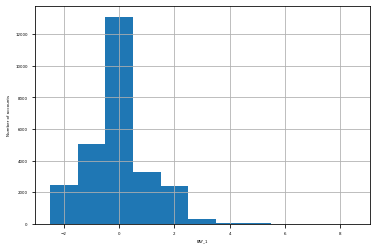

In [140]:
pay_1_bins = np.array(range(-2,10)) - 0.5
data_ohe[pay_feats[0]].hist(bins=pay_1_bins)
plt.xlabel('PAY_1')
plt.ylabel('Number of accounts')

array([[<AxesSubplot:title={'center':'PAY_1'}>,
        <AxesSubplot:title={'center':'PAY_2'}>,
        <AxesSubplot:title={'center':'PAY_3'}>],
       [<AxesSubplot:title={'center':'PAY_4'}>,
        <AxesSubplot:title={'center':'PAY_5'}>,
        <AxesSubplot:title={'center':'PAY_6'}>]], dtype=object)

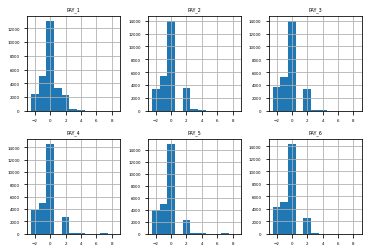

In [141]:
plt.rcParams['font.size'] = 4
data_ohe[pay_feats].hist(bins=pay_1_bins, layout=(2,3))

In [142]:
data_ohe.loc[data_ohe['PAY_2']==2, ['PAY_2', 'PAY_3']].head()

,PAY_2,PAY_3
0,2,-1
1,2,0
13,2,2
15,2,0
50,2,2


# Activity 1: Exploring Remaining Financial Features in the Dataset

In [146]:
fin_feats = ['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']

In [152]:
data_ohe[fin_feats[0:6]].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000
mean,51405.730723,49300.001500,47026.340047,43338.894539,40338.136701,38889.872337
std,73633.687106,70934.549534,68705.359524,64275.250740,60705.944083,59432.541657
min,-165580.000000,-69777.000000,-157264.000000,-170000.000000,-81334.000000,-339603.000000
25%,3580.000000,2999.750000,2627.250000,2341.750000,1745.000000,1256.000000
50%,22361.000000,21150.000000,20079.500000,19037.000000,18066.000000,17005.000000
75%,67649.750000,64395.500000,60360.000000,54727.500000,50290.500000,49253.750000
max,746814.000000,671563.000000,855086.000000,706864.000000,823540.000000,699944.000000


array([[<AxesSubplot:title={'center':'BILL_AMT1'}>,
        <AxesSubplot:title={'center':'BILL_AMT2'}>,
        <AxesSubplot:title={'center':'BILL_AMT3'}>],
       [<AxesSubplot:title={'center':'BILL_AMT4'}>,
        <AxesSubplot:title={'center':'BILL_AMT5'}>,
        <AxesSubplot:title={'center':'BILL_AMT6'}>]], dtype=object)

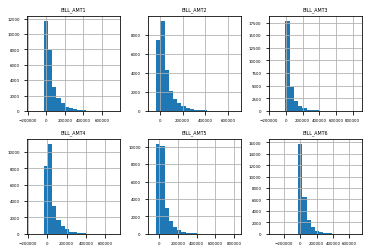

In [153]:
data_ohe[fin_feats[0:6]].hist(bins=20, layout=(2,3))

In [160]:
data_ohe[fin_feats[6:12]].describe()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,26664.000000,2.666400e+04,26664.000000,26664.000000,26664.000000,26664.000000
mean,5704.085771,5.881110e+03,5259.514964,4887.048717,4843.729973,5257.843047
std,16699.398632,2.121431e+04,17265.439561,15956.349371,15311.721795,17635.468185
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1000.000000,8.020000e+02,390.000000,294.750000,242.750000,111.000000
50%,2114.500000,2.007000e+03,1822.000000,1500.000000,1500.000000,1500.000000
75%,5027.000000,5.000000e+03,4556.250000,4050.500000,4082.750000,4015.000000
max,873552.000000,1.227082e+06,889043.000000,621000.000000,426529.000000,528666.000000


array([[<AxesSubplot:title={'center':'PAY_AMT1'}>,
        <AxesSubplot:title={'center':'PAY_AMT2'}>,
        <AxesSubplot:title={'center':'PAY_AMT3'}>],
       [<AxesSubplot:title={'center':'PAY_AMT4'}>,
        <AxesSubplot:title={'center':'PAY_AMT5'}>,
        <AxesSubplot:title={'center':'PAY_AMT6'}>]], dtype=object)

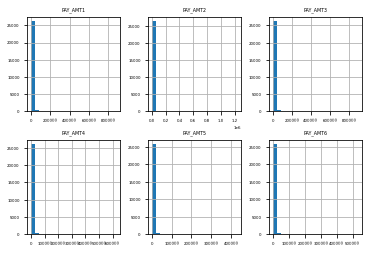

In [158]:
data_ohe[fin_feats[6:12]].hist(bins=20, layout=(2,3), xrot = 2)

In [171]:
pay_mask = data_ohe[fin_feats[6:12]] == 0 
pay_mask.sum()

PAY_AMT1    4656
PAY_AMT2    4833
PAY_AMT3    5293
PAY_AMT4    5697
PAY_AMT5    5981
PAY_AMT6    6373
dtype: int64

array([[<AxesSubplot:title={'center':'PAY_AMT1'}>,
        <AxesSubplot:title={'center':'PAY_AMT2'}>,
        <AxesSubplot:title={'center':'PAY_AMT3'}>],
       [<AxesSubplot:title={'center':'PAY_AMT4'}>,
        <AxesSubplot:title={'center':'PAY_AMT5'}>,
        <AxesSubplot:title={'center':'PAY_AMT6'}>]], dtype=object)

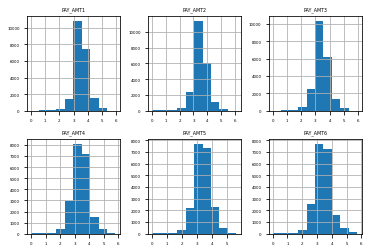

In [173]:
data_ohe[fin_feats[6:12]][~pay_mask].apply(np.log10).hist(layout=(2,3))